In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.zipping them as pairs with zip function
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
''''
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    ''''

SyntaxError: EOL while scanning string literal (<ipython-input-9-7a5c2ad7d7c8>, line 11)

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
     # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | vao
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | angra
City not found. Skipping...
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | coquimbo
Processing Record 7 of Set 1 | zhumadian
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | casper
Processing Record 10 of Set 1 | gobabis
Processing Record 11 of Set 1 | yatou
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | shibetsu
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | bereda
Processing Record 18 of Set 1 | parainen
Processing Record 19 of Set 1 | grand centre
City not found. Skipping...
Processing Record 20 of Set 1 | southbridge
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | mungaoli
Processing Record 23 of Set 1 | oranj

Processing Record 41 of Set 4 | ozgon
City not found. Skipping...
Processing Record 42 of Set 4 | bayan
Processing Record 43 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 44 of Set 4 | dong hoi
Processing Record 45 of Set 4 | lang suan
Processing Record 46 of Set 4 | colac
Processing Record 47 of Set 4 | leon valley
Processing Record 48 of Set 4 | eureka
Processing Record 49 of Set 4 | acapulco
Processing Record 50 of Set 4 | san patricio
Processing Record 1 of Set 5 | evensk
Processing Record 2 of Set 5 | forbes
Processing Record 3 of Set 5 | montgomery
Processing Record 4 of Set 5 | vygonichi
Processing Record 5 of Set 5 | saryozek
Processing Record 6 of Set 5 | hambantota
Processing Record 7 of Set 5 | caravelas
Processing Record 8 of Set 5 | klyuchi
Processing Record 9 of Set 5 | lagoa
Processing Record 10 of Set 5 | burgeo
Processing Record 11 of Set 5 | mareeba
Processing Record 12 of Set 5 | bubaque
Processing Record 13 of Set 5 | cascas
Processing Recor

Processing Record 30 of Set 8 | kalmunai
Processing Record 31 of Set 8 | kashima
Processing Record 32 of Set 8 | kabare
Processing Record 33 of Set 8 | diamantina
Processing Record 34 of Set 8 | goderich
Processing Record 35 of Set 8 | portland
Processing Record 36 of Set 8 | leningradskiy
Processing Record 37 of Set 8 | aris
Processing Record 38 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 39 of Set 8 | raudeberg
Processing Record 40 of Set 8 | camacupa
Processing Record 41 of Set 8 | ballina
Processing Record 42 of Set 8 | cayenne
Processing Record 43 of Set 8 | geraldton
Processing Record 44 of Set 8 | comodoro rivadavia
Processing Record 45 of Set 8 | keetmanshoop
Processing Record 46 of Set 8 | novyy urgal
Processing Record 47 of Set 8 | le vauclin
Processing Record 48 of Set 8 | xacmaz
Processing Record 49 of Set 8 | nanortalik
Processing Record 50 of Set 8 | urusha
Processing Record 1 of Set 9 | jinchang
Processing Record 2 of Set 9 | sur
Processing Record

Processing Record 17 of Set 12 | shimoda
Processing Record 18 of Set 12 | hobyo
Processing Record 19 of Set 12 | valparaiso
Processing Record 20 of Set 12 | itarema
Processing Record 21 of Set 12 | byron bay
Processing Record 22 of Set 12 | bambous virieux
Processing Record 23 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 24 of Set 12 | yerbogachen
Processing Record 25 of Set 12 | rio grande
Processing Record 26 of Set 12 | yasothon
Processing Record 27 of Set 12 | kabinda
Processing Record 28 of Set 12 | vila
Processing Record 29 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 30 of Set 12 | qandala
Processing Record 31 of Set 12 | effingham
Processing Record 32 of Set 12 | atbasar
Processing Record 33 of Set 12 | bathsheba
Processing Record 34 of Set 12 | kasongo-lunda
Processing Record 35 of Set 12 | luderitz
Processing Record 36 of Set 12 | sao gabriel da cachoeira
Processing Record 37 of Set 12 | zhigansk
Processing Record 38 of Set 12 | 

In [12]:
len(city_data)

558

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vao,-22.6667,167.4833,67.96,66,98,13.42,NC,2021-07-12 17:23:12
1,Qaanaaq,77.4840,-69.3632,42.21,62,20,5.61,GL,2021-07-12 17:23:13
2,Port Elizabeth,-33.9180,25.5701,59.29,72,40,25.32,ZA,2021-07-12 17:23:13
3,Port Alfred,-33.5906,26.8910,65.75,65,60,24.16,ZA,2021-07-12 17:23:13
4,Coquimbo,-29.9533,-71.3436,60.53,67,75,9.22,CL,2021-07-12 17:23:13
...,...,...,...,...,...,...,...,...,...
553,Valdosta,30.8327,-83.2785,88.52,60,1,4.61,US,2021-07-12 17:25:25
554,Rabo De Peixe,37.8000,-25.5833,71.11,64,40,9.22,PT,2021-07-12 17:25:26
555,Zhanaozen,43.3000,52.8000,88.30,24,0,17.07,KZ,2021-07-12 17:25:26
556,Ishigaki,24.3448,124.1572,84.20,76,16,12.24,JP,2021-07-12 17:25:26


In [15]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vao,NC,2021-07-12 17:23:12,-22.6667,167.4833,67.96,66,98,13.42
1,Qaanaaq,GL,2021-07-12 17:23:13,77.4840,-69.3632,42.21,62,20,5.61
2,Port Elizabeth,ZA,2021-07-12 17:23:13,-33.9180,25.5701,59.29,72,40,25.32
3,Port Alfred,ZA,2021-07-12 17:23:13,-33.5906,26.8910,65.75,65,60,24.16
4,Coquimbo,CL,2021-07-12 17:23:13,-29.9533,-71.3436,60.53,67,75,9.22
...,...,...,...,...,...,...,...,...,...
553,Valdosta,US,2021-07-12 17:25:25,30.8327,-83.2785,88.52,60,1,4.61
554,Rabo De Peixe,PT,2021-07-12 17:25:26,37.8000,-25.5833,71.11,64,40,9.22
555,Zhanaozen,KZ,2021-07-12 17:25:26,43.3000,52.8000,88.30,24,0,17.07
556,Ishigaki,JP,2021-07-12 17:25:26,24.3448,124.1572,84.20,76,16,12.24


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

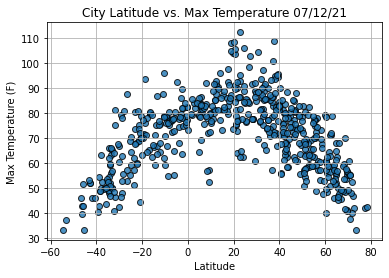

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

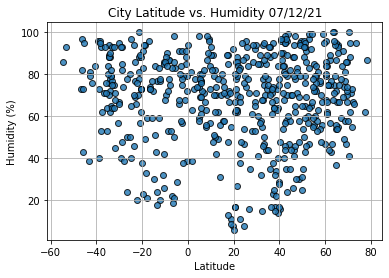

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

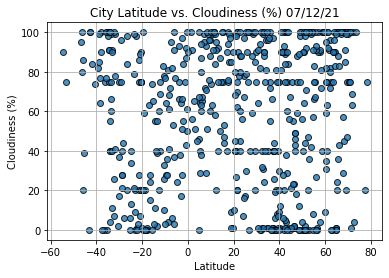

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

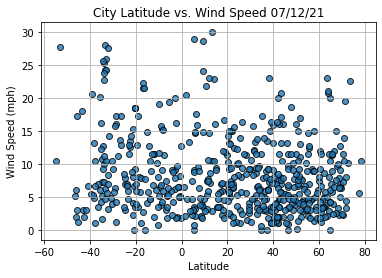

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()